In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.integrate as integrate

# Versión iterativa

In [2]:
""" Versión que dibuja los puntos y la función, además de calcular la integral con Scipy"""
def integra_mcIterativo1(fun, a, b, num_puntos=10000):

    ejex = np.linspace(a,b,num_puntos)
    ejey = fun(ejex)
    M = max(ejey)
    m = min(ejey)
    numAleatoriosX=np.zeros(num_puntos)
    numAleatoriosY=np.zeros(num_puntos)
    Ndebajo = 0
    
    for i in range (num_puntos):
        numAleatoriosX[i] = np.random.uniform(a,b)
        numAleatoriosY[i] = np.random.uniform(m, M)

        
        if (fun(numAleatoriosX[i]) > numAleatoriosY[i]):
        
            Ndebajo+=1
    
    integral1 = (Ndebajo/num_puntos)*(b-a)*M
    integral2 = integrate.quad(fun,a,b)
    
    funcion = np.linspace(a,b)
    
    print('Integral por metodo Montecarlo: ',integral1,'\n')
    print('Integral por Scipy: ',integral2)
    

    plt.figure()
    plt.scatter(numAleatoriosX, numAleatoriosY, c='red', label='Puntos')
    plt.plot(funcion, fun(funcion), c='Blue', label='Funcion')
    plt.show()

## Integral de función seno entre 0 y π

Integral por metodo Montecarlo:  1.9748051176784889 

Integral por Scipy:  (2.0, 2.220446049250313e-14)


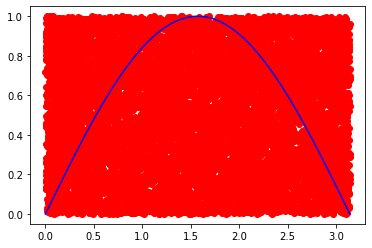

In [3]:
integra_mcIterativo1(np.sin,0,np.pi)

## Integral de función exponencial entre 0 y π

Integral por metodo Montecarlo:  19.839456119937015 

Integral por Scipy:  (22.140692632779267, 2.458110674206012e-13)


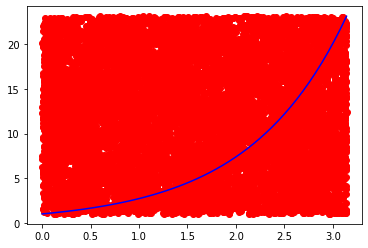

In [4]:
integra_mcIterativo1(np.exp,0,np.pi)

## Integral de función tangente hiperbólica entre 0 y π

Integral por metodo Montecarlo:  2.480430720738169 

Integral por Scipy:  (2.4503111742581463, 4.369430566346445e-10)


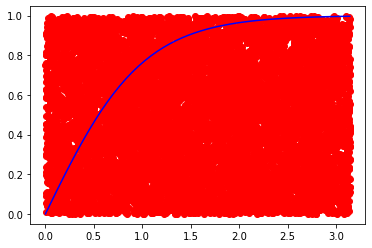

In [5]:
integra_mcIterativo1(np.tanh,0,np.pi)

# Versión con vectores

In [6]:
""" Versión que también dibuja los puntos y la gráfica, además de calcular la integral con Scipy"""
def integra_mcVectorizacion1(fun, a, b, num_puntos=10000):

    ejex = np.linspace(a,b,num_puntos)
    ejey = fun(ejex)
    M = max(ejey)
    m = min(ejey)
    numAleatoriosX=np.zeros(num_puntos)
    numAleatoriosY=np.zeros(num_puntos)
    
   
    numAleatoriosX = np.random.uniform(a,b,num_puntos)
    numAleatoriosY = np.random.uniform(m, M,num_puntos)
   
    
    NdebajoVectorizacion = np.sum(fun(numAleatoriosX) > numAleatoriosY)
        
    integralVector = (NdebajoVectorizacion/num_puntos)*(b-a)*M
    
    integral = integrate.quad(fun,a,b)
    
    funcion = np.linspace(a,b)
    
    print('Integral por metodo Montecarlo con vectorización: ',integralVector,'\n')
    print('Integral por Scipy: ',integral)
    

    plt.figure()
    plt.scatter(numAleatoriosX, numAleatoriosY, c='red', label='Puntos')
    plt.plot(funcion, fun(funcion), c='Blue', label='Funcion')
    plt.show()

## Integral de función seno entre 0 y π

Integral por metodo Montecarlo con vectorización:  2.0162741401941684 

Integral por Scipy:  (2.0, 2.220446049250313e-14)


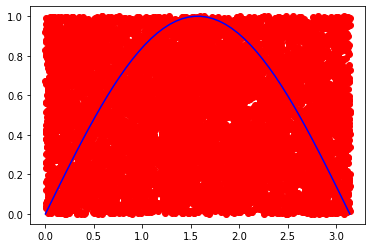

In [7]:
integra_mcVectorizacion1(np.sin,0,np.pi)

## Integral de función exponencial entre 0 y π

Integral por metodo Montecarlo con vectorización:  19.795836941952544 

Integral por Scipy:  (22.140692632779267, 2.458110674206012e-13)


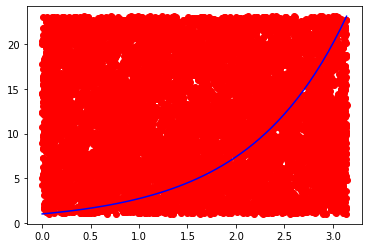

In [8]:
integra_mcVectorizacion1(np.exp,0,np.pi)

## Integral de función tangente hiperbólica entre 0 y π

Integral por metodo Montecarlo con vectorización:  2.429413659857371 

Integral por Scipy:  (2.4503111742581463, 4.369430566346445e-10)


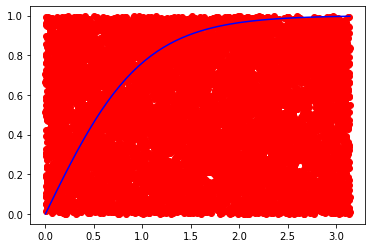

In [9]:
integra_mcVectorizacion1(np.tanh,0,np.pi)

# Comparación de tiempos

In [10]:
""" Versión que sólo calcula la integral de forma iterativa"""
def integra_mcIterativo2(fun, a, b, num_puntos=10000):

    ejex = np.linspace(a,b,num_puntos)
    ejey = fun(ejex)
    M = max(ejey)
    m = min(ejey)
    numAleatoriosX=np.zeros(num_puntos)
    numAleatoriosY=np.zeros(num_puntos)
    Ndebajo = 0
    
    for i in range (num_puntos):
        numAleatoriosX[i] = np.random.uniform(a,b)
        numAleatoriosY[i] = np.random.uniform(m, M)

        
        if (fun(numAleatoriosX[i]) > numAleatoriosY[i]):
        
            Ndebajo+=1
    
    integral1 = (Ndebajo/num_puntos)*(b-a)*M

In [11]:
""" Versión que sólo calcula la integral de forma vectorial"""
def integra_mcVectorizacion2(fun, a, b, num_puntos=10000):

    ejex = np.linspace(a,b,num_puntos)
    ejey = fun(ejex)
    M = max(ejey)
    m = min(ejey)
    numAleatoriosX=np.zeros(num_puntos)
    numAleatoriosY=np.zeros(num_puntos)
    
   
    numAleatoriosX = np.random.uniform(a,b,num_puntos)
    numAleatoriosY = np.random.uniform(m, M,num_puntos)
   
    
    NdebajoVectorizacion = np.sum(fun(numAleatoriosX) > numAleatoriosY)
        
    integralVector = (NdebajoVectorizacion/num_puntos)*(b-a)*M

In [12]:
import matplotlib.pyplot as pylot
import time

def compara_tiempos_dot(fun,a,b):
    sizes = np.linspace(100, 10000000, 20)
    times_dot = []
    times_fast_dot = []
    for size in sizes:
        
        tic = time.process_time()
        integralIterativa = integra_mcIterativo2(fun,a,b)
        toc = time.process_time()
        
        times_dot += [1000 * (toc - tic)]
        
        tic = time.process_time()
        IntegralConVectores = integra_mcVectorizacion2(fun,a,b)
        toc = time.process_time()
        
        times_fast_dot += [1000 * (toc - tic)]
        
    plt.figure()
    plt.scatter(sizes, times_dot, c='red', label='bucle')
    plt.scatter(sizes, times_fast_dot, c='blue', label='vector')
    plt.legend() 
    plt.show()

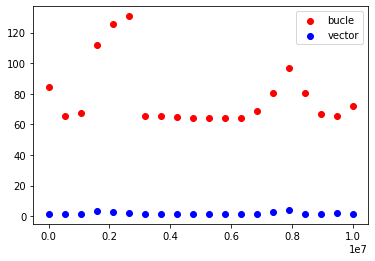

In [13]:
compara_tiempos_dot(np.sin,0,np.pi)

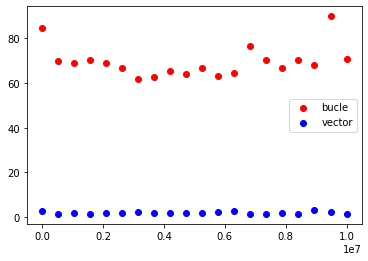

In [14]:
compara_tiempos_dot(np.exp,0,np.pi)

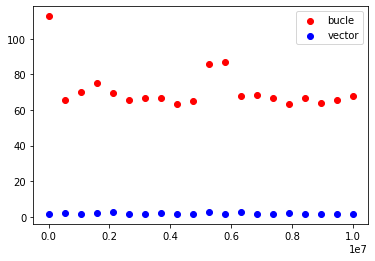

In [15]:
compara_tiempos_dot(np.tanh,0,np.pi)